In [ ]:
#Ο συγκεκριμένος κώδικας αφορά την εκπάιδευση μοντέλων να ταξινομούν συνδιασμό καταστάσεων σε καλή = 1  ή κακή = 0 κατάσταση των μερών ενος οχήματος που δουλεύει με κυψέλες υδρογόνου και ηλεκτρομηχανή.
#Εδώ έφτιαξα σε ένα notebook των κώδικα τον οποίο δημιούρησα πρώτα στο πρόγραμμα pycharm, κάθε κελί έχει αναλυτική επεξήγηση για την δική σας βοήθεια.
#Το συγκεκριμένο notebook περιέχει κάθε βήμα ξεχωριστά, το ένακα γιατί διευκολύνει την ανάγνωση
#Συνημμένο θα έχετε και το αρχείο που έφτιαξα πρώτα στο Pycharm

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import os

In [ ]:
# 1. Ανάγνωση αρχείου που ήδη έχει το target (για να τρέξει πρέπει να φορτωθεί εδώ στο DRIVE με το ίδιο ακρίβώς όνομα)
data = pd.read_csv("Hydrogen_Consumption_Dataset_with_target.csv")

In [ ]:
# 2. Ορισμός χαρακτηριστικών-στοχου με παρουσίαση του συνόλου των καταστάσεων 0 = αρνητική κατάσταση & 1 = θετική κατάσταση
X = data.drop('target', axis=1)
y = data['target']
print(data["target"].value_counts())

target
1    259
0    241
Name: count, dtype: int64


In [ ]:
# 3. Χωρισμός σε train/test και κανονικοποίηση #εδώ το test size=0.2 οριζει το ποσοστό
# των δεδομένων που θα χρησιμοποιήσει για εκπαίδευση και test. Το 0.2 αντιστοιχεί στο 20% των δεδομένων
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# 4. Ορισμός μοντέλων που θα εκπαιδευτούν πάνω στο dataset που έχουμε δημιουργήσει
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Support Vector Machine": SVC(random_state=42)
}

In [ ]:
# 5. Εκπαίδευση και αξιολόγηση με cross-validation και αποθήκευση confusion matrix
metrics_results = []
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#StratifiedKFold
#Κάθε fold έχει ίδια κατανομή κατηγοριών με το αρχικό dataset (γι’ αυτό λέγεται stratified = στρωματοποιημένος)
# n_splits=5
#Σημαίνει: Θα χωρίσει το dataset σε 5 μέρη.Σε κάθε "γύρο" (fold), θα εκπαιδεύσει το μοντέλο στα 4 και θα το δοκιμάσει στο 1.
#shuffle=True
#Σημαίνει: Ανακατεύει (shuffle) τα δεδομένα πριν τα χωρίσει σε folds.Αν δεν το βάλουμε,
#τα δεδομένα χωρίζονται με βάση τη σειρά που εμφανίζονται, κάτι που μπορεί να προκαλέσει μεροληψία αν είναι ταξινομημένα.
#random_state=42
#Όπως και πριν, ορίζει "σπόρο" για το ανακάτεμα, ώστε: να έχουμε αναπαραγωγιμότητα, το ίδιο shuffle να γίνεται κάθε φορά


Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        47

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



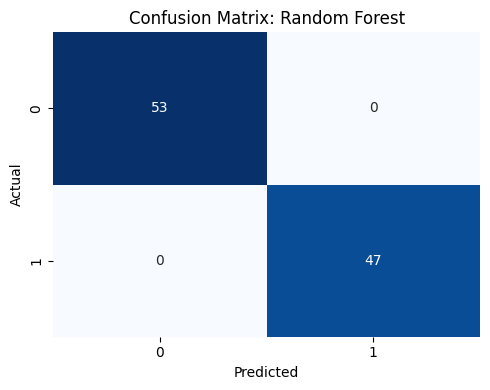

Αποθηκεύτηκε: outputs/Random_Forest_confusion_matrix.png

Naive Bayes
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        53
           1       0.96      1.00      0.98        47

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



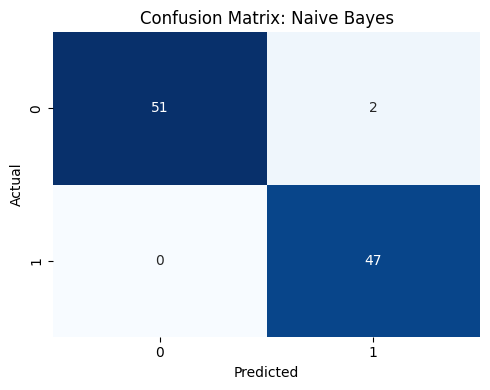

Αποθηκεύτηκε: outputs/Naive_Bayes_confusion_matrix.png

K-Nearest Neighbors
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        53
           1       0.89      1.00      0.94        47

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.95      0.94      0.94       100



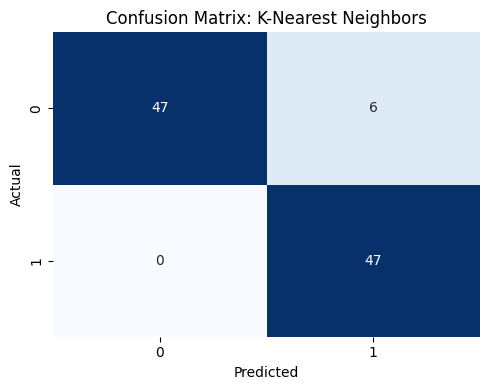

Αποθηκεύτηκε: outputs/K-Nearest_Neighbors_confusion_matrix.png

Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.98      1.00      0.99        47

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



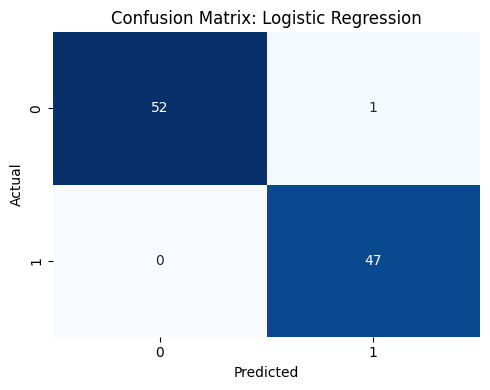

Αποθηκεύτηκε: outputs/Logistic_Regression_confusion_matrix.png

Support Vector Machine
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.98      1.00      0.99        47

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



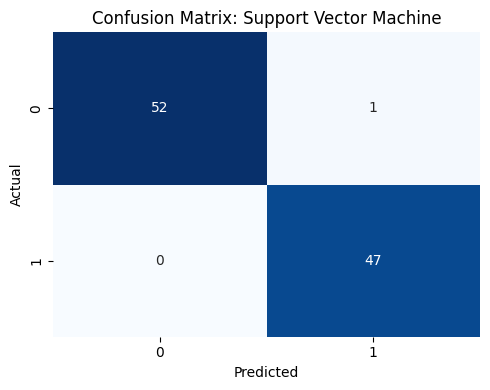

Αποθηκεύτηκε: outputs/Support_Vector_Machine_confusion_matrix.png


In [ ]:
# 6. Δημιουργία φακέλου για αποθήκευση εικόνων
os.makedirs("outputs", exist_ok=True)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cv_mean = cross_val_score(model, X, y, cv=cv, scoring='accuracy').mean()

    metrics_results.append((name, acc, prec, rec, f1, cv_mean))

    print(f"\n{name}")
    print(classification_report(y_test, y_pred))

    # Οπτικοποίηση confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()

    # Εμφάνιση στο χρήστη
    plt.show()

    # Αποθήκευση εικόνας
    filename = f"outputs/{name.replace(' ', '_')}_confusion_matrix.png"
    plt.savefig(filename)
    print(f"Αποθηκεύτηκε: {filename}")
    plt.close()



Συνολικά Αποτελέσματα:
                    Model  Accuracy  Precision  Recall  F1 Score  \
0           Random Forest      1.00   1.000000     1.0  1.000000   
4  Support Vector Machine      0.99   0.979167     1.0  0.989474   
3     Logistic Regression      0.99   0.979167     1.0  0.989474   
1             Naive Bayes      0.98   0.959184     1.0  0.979167   
2     K-Nearest Neighbors      0.94   0.886792     1.0  0.940000   

   CV Mean Accuracy  
0             1.000  
4             0.522  
3             0.994  
1             0.988  
2             0.944  


<Figure size 1200x800 with 0 Axes>

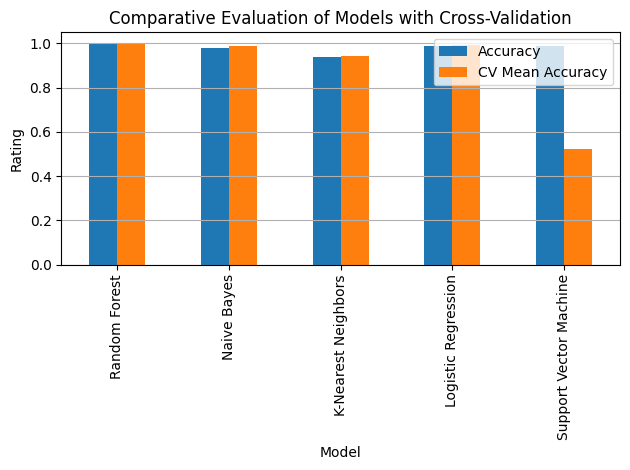


The best model based on Accuracy is: Random Forest with score 1.000


In [ ]:
# 7. Συνολικός πίνακας αποτελεσμάτων
metrics_df = pd.DataFrame(metrics_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "CV Mean Accuracy"])
print("\nΣυνολικά Αποτελέσματα:")
print(metrics_df.sort_values(by="Accuracy", ascending=False))

# 7. Οπτικοποίηση συνολικών αποτελεσμάτων (Accuracy & CV Accuracy)
plt.figure(figsize=(12, 8))
metrics_df.set_index("Model")[["Accuracy", "CV Mean Accuracy"]].plot(kind='bar')
plt.title("Comparative Evaluation of Models with Cross-Validation")
plt.ylabel("Rating")
plt.ylim(0, 1.05)
plt.grid(axis='y')
plt.tight_layout()

# Εμφάνιση του διαγράμματος στην οθόνη
plt.show()

# Αποθήκευση του διαγράμματος
plt.savefig("outputs/model_comparison.png")
plt.close()

# Εμφάνιση καλύτερου μοντέλου βάσει Accuracy
best_model_acc = metrics_df.loc[metrics_df["Accuracy"].idxmax()]
print(f"\nThe best model based on Accuracy is: {best_model_acc['Model']} with score {best_model_acc['Accuracy']:.3f}")


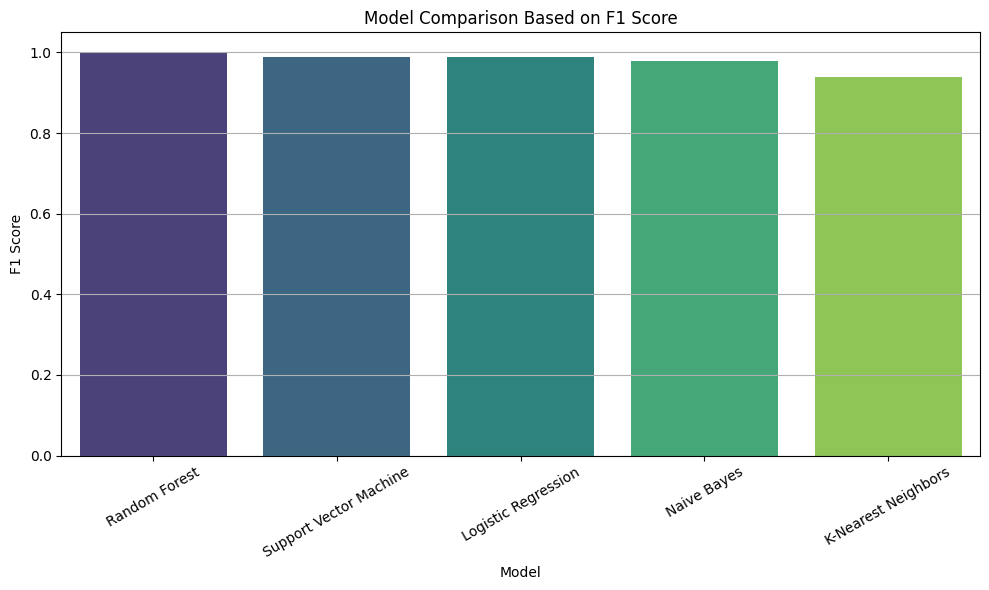

In [ ]:
# 8. Ραβδόγραμμα για το καλύτερο μοντέλο βάσει F1 Score
best_metric = "F1 Score"  # Μπορώ να βάλω και "Accuracy", "Recall" κ.λπ.

# Ταξινόμηση και σχεδίαση
sorted_df = metrics_df.sort_values(by=best_metric, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=sorted_df, x='Model', y=best_metric, hue='Model', palette='viridis', legend=False)
plt.title(f"Model Comparison Based on {best_metric}")
plt.ylabel(best_metric)
plt.ylim(0, 1.05)
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.tight_layout()

# Εμφάνιση του διαγράμματος στην οθόνη
plt.show()

# Αποθήκευση διαγράμματος
plt.savefig(f"outputs/best_model_by_{best_metric.replace(' ', '_').lower()}.png")
plt.close()
